#Code to create the real intra university network present in the caltech.net file

clu 0.40929439048517247 avg 43.3185955786736 diam 0 com 11


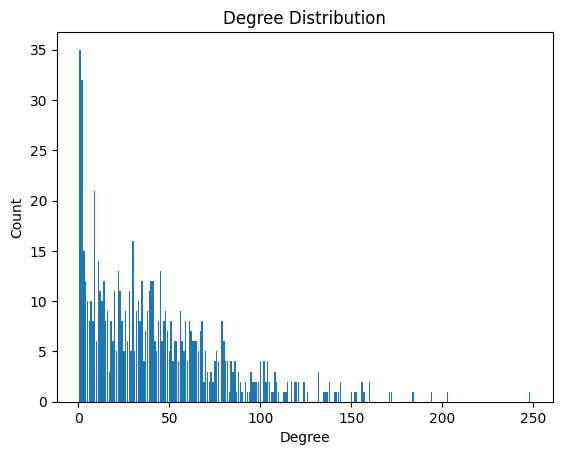

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community
%matplotlib inline

# Load the Pajek file
G_pajek = nx.read_pajek('caltech.net')

# Convert the Pajek network to a NetworkX graph
G = nx.Graph(G_pajek)
clu = nx.average_clustering(G)
diam =0
avg= sum(dict(G.degree).values())/len(G)
if nx.is_connected(G):

  diam = nx.diameter(G)

com = list(community.greedy_modularity_communities(G))
print('clu',clu,'avg',avg,'diam',diam,'com',len(com))
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_count = dict()
for degree in degree_sequence:
    if degree in degree_count:
        degree_count[degree] += 1
    else:
        degree_count[degree] = 1
degrees = sorted(degree_count.keys())
degree_counts = [degree_count[degree] for degree in degrees]

# plot the degree distribution
plt.bar(degrees, degree_counts)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()
# Calculate Kamada-Kawai layout
# pos = nx.kamada_kawai_layout(G)

# Draw the graph
# nx.draw(G, pos, with_labels=True)

# Show the plot
# plt.show()


#Our Network Synthetic Generator
The attribute is provided in the file attributes.csv

769
Average degree of the network: 50.67880364109233
clu 0.4250393157594359
check average 50.67880364109233
8


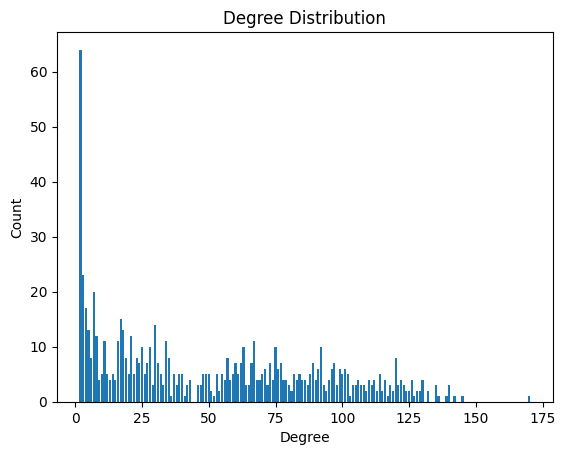

In [2]:
from typing import List
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt
from networkx.algorithms import community
class Node:
    def __init__(self, node_id: int, interests: List[int]):
        self.node_id = node_id
        self.interests = interests
        self.neighbors = []
        self.degree =   0
    def increment_degree(self):
        self.degree += 1


class SocialNetworkGenerator:
    def __init__(self, num_nodes: int, num_interests: int, threshold: float, filename: str):
        self.num_nodes = num_nodes
        self.num_interests = num_interests
        self.threshold = threshold
        self.filename = filename
        
    def read_interests(self) -> List[List[int]]:
        with open(self.filename, 'r') as f:
            # f.readline()
            lines = f.readlines()[1:]
        interests = []
        for line in lines:
            # values = line.strip().split('\t')
            values = line.strip().split('\t')[1:]
            # print(values)
            interests.append(list(map(int, values)))
        return interests
        
    def generate_social_network(self) -> List[Node]:
        # Read interests from file
        interests = self.read_interests()
        nodes = []
        # print('first',nodes)
        node0 = Node(0,interests[0])
        node1 = Node(1,interests[1])
        nodes.append(node0)
        nodes.append(node1)
        # print('seconf',nodes)
        node0.neighbors.append(node1)
        node0.increment_degree()
        node1.neighbors.append(node0)
        node1.increment_degree()
        # print(node1.degree,node0.degree)
        # Create nodes with interests and add edges

        for i in range(2,self.num_nodes):
            # print('sfjhkjs',i)
            node = Node(i, interests[i])
            nodes.append(node)
            candidates = []
            candi_nodes = []
            # print(nodes)
            for j, other_node in enumerate(nodes):
                # print('fsknf',j)
                # print('othet',other_node.node_id,'cutte',i)
                if j == i:
          
                    continue
                list1 = node.interests
                list2 = other_node.interests
                  # if list1[3]==0 and list2[3]==0:
                  #   list1[3]=random.randint(1,10000)
                  #   list2[3]=random.randint(1,10000)

                for i in range(7):
                  if list1[i]==0:
                    list1[i]==random.randint(1,10000)
                  if list2[i]==0:
                      list2[i]==random.randint(1,10000)
                
                intersection = []
                union = []
                for k in range(len(list1)):
                  if list1[k] == list2[k]:
                      intersection.append(list1[k])
                      union.append(list1[k])
                  else:
                      union.append(list1[k])
                      union.append(list2[k])

                # intersection = np.sum(np.logical_and(node.interests, other_node.interests))
                # union = np.sum(np.logical_or(node.interests, other_node.interests))
                # print('new',node.interests,'exis',other_node.interests)
                # print('uni',union,'int',intersection)
                jaccard = len(intersection) /6
                # print(jaccard)
                if jaccard >= self.threshold:
                    candidates.append((j, jaccard))
                    candi_nodes.append(other_node)
            
            if len(candidates) > 0:
                prob = np.zeros(len(candidates))
                for idx, (j, jaccard) in enumerate(candidates):
                    prob[idx] = len(nodes[j].neighbors) / sum(len(n.neighbors) for n in candi_nodes)
                for k in range(2):
                  chosen_node_idx = np.random.choice(len(candi_nodes), size=1, replace=False, p=prob / np.sum(prob))[0]
                  chosen_node_idx1 = candi_nodes[chosen_node_idx].node_id
                  chosen_node = nodes[chosen_node_idx1]
                  if chosen_node not in node.neighbors:
                    node.neighbors.append(chosen_node)
                    chosen_node.neighbors.append(node)
                    node.increment_degree()
                    chosen_node.increment_degree()
#########################################################################################################################
#         for i in range(1 ,2):

#           for node in nodes:
#               # interests = np.random.randint(2, size=self.num_interests)
#               # node = Node(i, interests)
#               # print('new node interest',node.interests)
#               # nodes.append(node)
#               # print('newlen',len(nodes))
#               candidates = []
#               candi_nodes=[]
              

#               # Compute the probability of adding an edge to an existing node
              
#               for j, other_node in enumerate(nodes):
#                   if j == node.node_id:  # Don't consider the newly added node
#                       continue
#                   if other_node in node.neighbors:
#                     # print('i have already formed node')
#                     continue
#                   list1 = node.interests
#                   list2 = other_node.interests
#                   # if list1[3]==0 and list2[3]==0:
#                   #   list1[3]=random.randint(1,10000)
#                   #   list2[3]=random.randint(1,10000)

#                   for k in range(7):
#                     if list1[k]==0:
#                       list1[k]==random.randint(1,10000)
#                     if list2[k]==0:
#                       list2[k]==random.randint(1,10000)

                  
                  
#                   intersection = []
#                   union = []
#                   for l in range(len(list1)):
#                     if list1[l] == list2[l]:
#                         intersection.append(list1[k])
#                         union.append(list1[k])
#                     else:
#                         union.append(list1[l])
#                         union.append(list2[l])

#                   # print(other_node.node_id)
#                   # print('new',node.interests,'exis',other_node.interests)
#                   # intersection = np.sum(np.logical_and(node.interests, other_node.interests))

#                   # union = np.sum(np.logical_or(node.interests, other_node.interests))
#                   # print(intersection , union )
#                   jaccard = len(intersection) / 6
#                   # print('iam jacc',jaccard)
#                   # print(len(other_node.neighbors),sum(len(n.neighbors) for n in nodes))
#                   if jaccard >=i*0.05:
                    
#                     # prob[j] = len(other_node.neighbors) / sum(len(n.neighbors) for n in nodes)
#                     # print('prob',prob)
#                     candidates.append((j,jaccard))
#                     candi_nodes.append(other_node)

#               # print('cand',candidates)

#               if len(candidates ) > 0:
#                 prob = np.zeros(len(candidates))

#                 for idx ,(j,jaccard) in enumerate(candidates):
#                   prob[idx] = len(nodes[j].neighbors) / sum(len(n.neighbors) for n in candi_nodes)
#                 # print('prob',prob)
#               # Add an edge to a randomly chosen node based on the probability scores
#                 chosen_node_idx = np.random.choice(len(candi_nodes), size=1, replace=False, p=prob / np.sum(prob))[0]
#                 # chosen_node_idx = np.random.choice(len(candi_nodes), size=1, replace=False)[0]

#                 # chosen_node_idx = random.choice(len(candi_nodes))

#                 # print('chosen',chosen_node_idx)
#                 chosen_node_idx1 = candi_nodes[chosen_node_idx].node_id
#                 # print('chosen1',chosen_node_idx1)

#                 # print()
#                 chosen_node = nodes[chosen_node_idx1]
#                 node.neighbors.append(chosen_node)
#                 chosen_node.neighbors.append(node)
#                 node.increment_degree()
                
#                 chosen_node.increment_degree()

# ###############################################################################
# # Refine network using Jaccard similarity
        for i in range(1):
          for node in nodes:
              # print('checking for',node.node_id)
              for neighbor in node.neighbors:
                  # print('checking for my neighbor',neighbor.node_id)
                  jaccard_scores = []
                  for friend in neighbor.neighbors:

                      # print('checking for my neighbors friend',friend.node_id)
                      if friend != node and friend not in node.neighbors:
                        list1 = node.interests
                        list2 = friend.interests
                        # if list1[3]==0 and list2[3]==0:
                        #   list1[3]=random.randint(1,10000)
                        #   list2[3]=random.randint(1,10000)
                        for k in range(7):
                          if list1[k]==0:
                            list1[k]==random.randint(1,10000)
                          if list2[k]==0:
                            list2[k]==random.randint(1,10000)
                        intersection = []
                        union = []
                        for l in range(len(list1)):
                          if list1[l] == list2[l]:
                              intersection.append(list1[k])
                              union.append(list1[k])
                          else:
                              union.append(list1[l])
                              union.append(list2[l])
                          # intersection = np.sum(np.logical_and(node.interests, friend.interests))
                          # union = np.sum(np.logical_or(node.interests, friend.interests))
                          jaccard = len(intersection) / 6
                          # print('calculating jaccard for',friend.node_id,jaccard)
                          jaccard_scores.append((jaccard, friend))
                  if jaccard_scores:
                    # jaccard_scores.sort(reverse=True)
                    jaccard_scores.sort(reverse=True, key=lambda x: x[0])
                    # print(jaccard_scores)
                    # l1 = len(jaccard_scores)
                    # for g in range(l1//2):
                    if jaccard_scores[0][0] >=0.6:
                    
                      # print('skjfdn',jaccard_scores[0][0])
                      _, best_friend = jaccard_scores[0]

                      node.neighbors.append(best_friend)
                      best_friend.neighbors.append(node)
                      node.increment_degree()
                      best_friend.increment_degree()

        return nodes

generator = SocialNetworkGenerator(num_nodes=769, num_interests=7, threshold=0.1, filename='attributes.csv')
network = generator.generate_social_network()

# Calculate the average degree of the network
total_degree = sum([node.degree for node in network])

num_nodes = len(network)
print(num_nodes)
average_degree = total_degree / num_nodes
print(f"Average degree of the network: {average_degree}")

# for node in network:
#     print(f"Node {node.node_id} neighbors: {[n.node_id for n in node.neighbors]}")

# for i in range(128):
#   print(i,network[i].interests)

# Create a NetworkX graph from the nodes and edges in the social network
G = nx.Graph()
for node in network:
    G.add_node(node.node_id)
    for neighbor in node.neighbors:
        G.add_edge(node.node_id, neighbor.node_id)
    
com = list(community.greedy_modularity_communities(G))
avg= sum(dict(G.degree).values())/len(G)
clu = nx.average_clustering(G)
print('clu',clu)
print('check average',avg)
print(len(com))

# Draw the network using the Kamada-Kawai layout algorithm
nx.write_pajek(G, 'social_network.net')
# pos = nx.kamada_kawai_layout(G)
# nx.draw(G, pos, with_labels=True)

# Show the plot
# plt.show()


# find the degree distribution
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_count = dict()
for degree in degree_sequence:
    if degree in degree_count:
        degree_count[degree] += 1
    else:
        degree_count[degree] = 1
degrees = sorted(degree_count.keys())
degree_counts = [degree_count[degree] for degree in degrees]

# plot the degree distribution
plt.bar(degrees, degree_counts)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()


#Comparing with Albert Barabasi Model 

clu 0.139085334323252
check average 52.10403120936281
Diameter 3
4


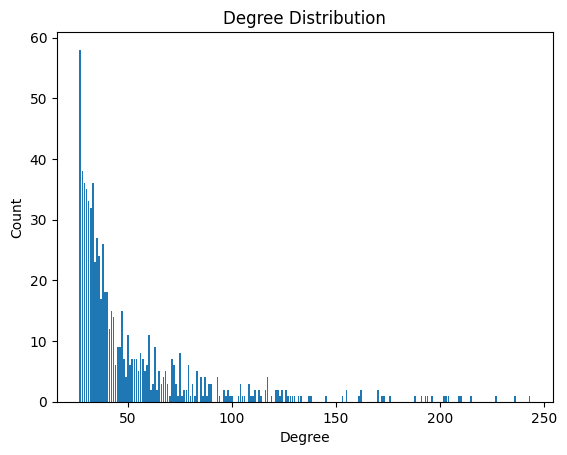

In [3]:
import networkx as nx
from typing import List
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt
from networkx.algorithms import community

# Generate a Barabasi-Albert random graph model
n = 769 # Number of nodes
m = 27  # Number of edges to attach from a new node to existing nodes
G = nx.barabasi_albert_graph(n, m)

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_count = dict()
com = list(community.greedy_modularity_communities(G))
avg= sum(dict(G.degree).values())/len(G)
clu = nx.average_clustering(G)
diam = nx.diameter(G) # calculate the diameter of the graph
print('clu',clu)
print('check average',avg)
print('Diameter',diam)
print(len(com))

for degree in degree_sequence:
    if degree in degree_count:
        degree_count[degree] += 1
    else:
        degree_count[degree] = 1
degrees = sorted(degree_count.keys())
degree_counts = [degree_count[degree] for degree in degrees]

# plot the degree distribution
plt.bar(degrees, degree_counts)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()

# Draw the graph
# nx.draw(G, with_labels=True)

# Show the plot
plt.show()


#Comparing with Erdos Renyi Network Generator

clu 0.06962615742623707
check average 53.581274382314696
diameter 3
4


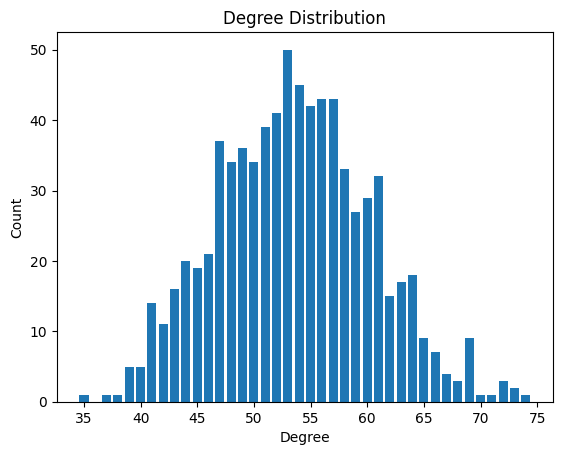

In [4]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt
from networkx.algorithms import community

# Generate an Erdős-Rényi random graph model
n = 769 # Number of nodes
p = 0.07 # Probability of creating an edge between two nodes
G = nx.erdos_renyi_graph(n, p)

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_count = dict()
com = list(community.greedy_modularity_communities(G))
avg= sum(dict(G.degree).values())/len(G)
clu = nx.average_clustering(G)
diam = nx.diameter(G) # calculate the diameter of the graph
print('clu',clu)
print('check average',avg)
print('diameter',diam)
print(len(com))

for degree in degree_sequence:
    if degree in degree_count:
        degree_count[degree] += 1
    else:
        degree_count[degree] = 1
degrees = sorted(degree_count.keys())
degree_counts = [degree_count[degree] for degree in degrees]

# plot the degree distribution
plt.bar(degrees, degree_counts)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()

# Draw the graph
# nx.draw(G, with_labels=True)

# Show the plot
plt.show()


#Comparing with Watts Strogatz Model

clu 0.5477533142506235
check average 52.0
diameter 3
3


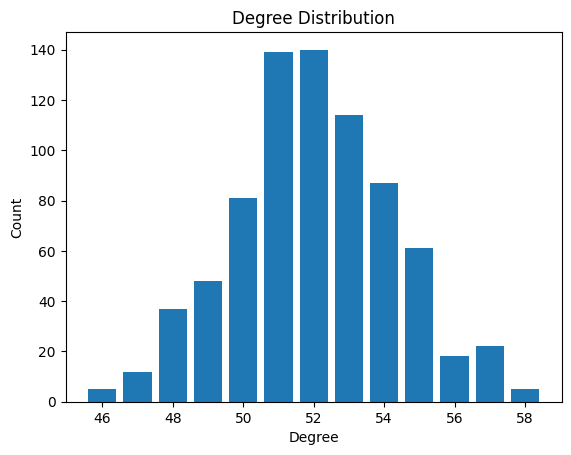

In [5]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt
from networkx.algorithms import community

# Generate a Watts-Strogatz small-world graph model
n = 769 # Number of nodes
k = 52  # Each node is connected to k nearest neighbors in a ring topology
p = 0.1 # Probability of rewiring each edge to a new node
G = nx.watts_strogatz_graph(n, k, p)

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_count = dict()
com = list(community.greedy_modularity_communities(G))
avg = sum(dict(G.degree).values())/len(G)
clu = nx.average_clustering(G)
diam = nx.diameter(G) # calculate the diameter of the graph
print('clu', clu)
print('check average', avg)
print('diameter', diam)
print(len(com))

for degree in degree_sequence:
    if degree in degree_count:
        degree_count[degree] += 1
    else:
        degree_count[degree] = 1
degrees = sorted(degree_count.keys())
degree_counts = [degree_count[degree] for degree in degrees]

# plot the degree distribution
plt.bar(degrees, degree_counts)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()

# Draw the graph
# nx.draw(G, with_labels=True)

# Show the plot
plt.show()


#The below model is just genreating attributes on its own , one do not need to pass the attributes.csv file 

<ipython-input-6-a0cf4ca5cc5e>:61: RuntimeWarning: invalid value encountered in long_scalars
  jaccard = intersection / union


769
Average degree of the network: 18.964889466840052
clu 0.4108900530574098
check average 18.964889466840052
Diameter 3
35


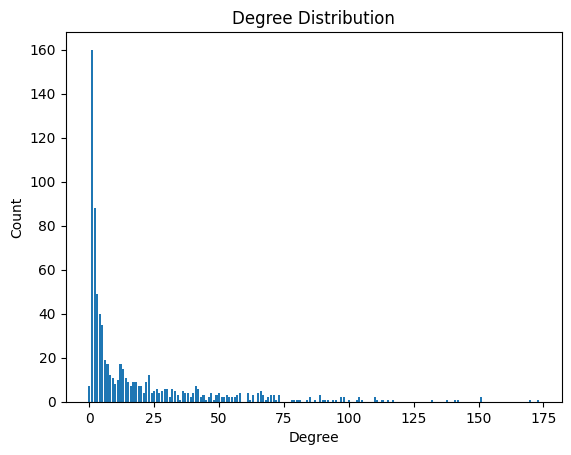

In [6]:
from typing import List
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

class Node:
    def __init__(self, node_id: int, interests: List[int]):
        self.node_id = node_id
        self.interests = interests
        self.neighbors = []
        self.degree =   0
    def increment_degree(self):
        self.degree += 1

class SocialNetworkGenerator:
    def __init__(self, num_nodes: int, num_interests: int, threshold: float):
        self.num_nodes = num_nodes
        self.num_interests = num_interests
        self.threshold = threshold
        
    def generate_social_network(self) -> List[Node]:
        # Create the first node
        interests = np.random.randint(2, size=self.num_interests)
        # print(interests)
        node0 = Node(0, interests)
        node0.increment_degree()
        nodes=[node0]
        # print('node0int',nodes[0].interests)
        interests1 = np.random.randint(2,size = self.num_interests)
        # print('hi',interests1)
        node1 = Node(1,interests1)
        # print('node1int',node1.interests)
        node1.increment_degree()
        nodes.append(node1)
        # print('len',len(nodes))
        node0.neighbors.append(node1)
        node1.neighbors.append(node0)


        # Create the remaining nodes and add edges
        for i in range(2, self.num_nodes):
            interests = np.random.randint(2, size=self.num_interests)
            node = Node(i, interests)
            # print('new node interest',node.interests)
            nodes.append(node)
            # print('newlen',len(nodes))
            candidates = []
            candi_nodes=[]

            # Compute the probability of adding an edge to an existing node
            
            for j, other_node in enumerate(nodes):
                if j == i:  # Don't consider the newly added node
                    continue
                # print(other_node.node_id)
                # print('new',node.interests,'exis',other_node.interests)
                intersection = np.sum(np.logical_and(node.interests, other_node.interests))

                union = np.sum(np.logical_or(node.interests, other_node.interests))
                # print(intersection , union )
                jaccard = intersection / union
                # print('iam jacc',jaccard)
                # print(len(other_node.neighbors),sum(len(n.neighbors) for n in nodes))
                if jaccard >=self.threshold:
                  
                  # prob[j] = len(other_node.neighbors) / sum(len(n.neighbors) for n in nodes)
                  # print('prob',prob)
                  candidates.append((j,jaccard))
                  candi_nodes.append(other_node)

            # print('candidates',candidates)
            # print('candi',candi_nodes)

            if len(candidates ) > 0:
              prob = np.zeros(len(candidates))

              for idx ,(j,jaccard) in enumerate(candidates):
                prob[idx] = len(nodes[j].neighbors) / sum(len(n.neighbors) for n in candi_nodes)
              # print('prob',prob)
            # Add an edge to a randomly chosen node based on the probability scores
              chosen_node_idx = np.random.choice(len(candi_nodes), size=1, replace=False, p=prob / np.sum(prob))[0]
              # print('chosen',chosen_node_idx)
              chosen_node_idx1 = candi_nodes[chosen_node_idx].node_id
              # print('chosen1',chosen_node_idx1)

              # print()
              chosen_node = nodes[chosen_node_idx1]
              node.neighbors.append(chosen_node)
              chosen_node.neighbors.append(node)
              node.increment_degree()
              
              chosen_node.increment_degree()
# Refine network using Jaccard similarity
        for i in range(1):
          for node in nodes:
              # print('checking for',node.node_id)
              for neighbor in node.neighbors:
                  # print('checking for my neighbor',neighbor.node_id)
                  jaccard_scores = []
                  for friend in neighbor.neighbors:
                      # print('checking for my neighbors friend',friend.node_id)
                      if friend != node and friend not in node.neighbors:
                          intersection = np.sum(np.logical_and(node.interests, friend.interests))
                          union = np.sum(np.logical_or(node.interests, friend.interests))
                          jaccard = intersection / union
                          # print('calculating jaccard for',friend.node_id,jaccard)
                          jaccard_scores.append((jaccard, friend))
                  if jaccard_scores:
                    # jaccard_scores.sort(reverse=True)
                    jaccard_scores.sort(reverse=True, key=lambda x: x[0])
                    # print(jaccard_scores)
                    if jaccard_scores[0][0] > 0.55:
                      # print('skjfdn',jaccard_scores[0][0])
                      _, best_friend = jaccard_scores[0]
                      node.neighbors.append(best_friend)
                      best_friend.neighbors.append(node)
                      node.increment_degree()
                      best_friend.increment_degree()

        return nodes

generator = SocialNetworkGenerator(num_nodes=769, num_interests=7, threshold=0.1)
network = generator.generate_social_network()

# Calculate the average degree of the network
total_degree = sum([node.degree for node in network])

num_nodes = len(network)
print(num_nodes)
average_degree = total_degree / num_nodes
print(f"Average degree of the network: {average_degree}")

# for node in network:
#     print(f"Node {node.node_id} neighbors: {[n.node_id for n in node.neighbors]}")

# for i in range(128):
#   print(i,network[i].interests)

# Create a NetworkX graph from the nodes and edges in the social network
G = nx.Graph()
for node in network:
    G.add_node(node.node_id)
    for neighbor in node.neighbors:
        G.add_edge(node.node_id, neighbor.node_id)
    
com = list(community.greedy_modularity_communities(G))
avg= sum(dict(G.degree).values())/len(G)
clu = nx.average_clustering(G)
# diam = nx.diameter(G) # calculate the diameter of the graph
print('clu',clu)
print('check average',avg)
print('Diameter',diam)
print(len(com))

# Draw the network using the Kamada-Kawai layout algorithm
# nx.write_pajek(G, 'social_network.net')
# pos = nx.kamada_kawai_layout(G)
# nx.draw(G, pos, with_labels=True)

# Show the plot
# plt.show()


# find the degree distribution
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_count = dict()
for degree in degree_sequence:
    if degree in degree_count:
        degree_count[degree] += 1
    else:
        degree_count[degree] = 1
degrees = sorted(degree_count.keys())
degree_counts = [degree_count[degree] for degree in degrees]

# plot the degree distribution
plt.bar(degrees, degree_counts)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()

